In [15]:
import matplotlib.pyplot as plt
import numpy as np

In [48]:
timesteps = 325
channel = 64
max_delay = 125
windows_width = 200

def getdata(filename):
    data = [[0 for c in range(channel)] for t in range(timesteps)]
    i = 0
    j = 0
    with open(filename, 'r', encoding='utf-8') as file:
        for line in file:
            data[i][j] = float(line)
            j+=1
            if j == 64:
                j = 0
                i += 1
    return data
ar = getdata('ar0.dat')
er = getdata('er4.dat')
print(ar[0])
print(er[0])

[50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124]
[50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.336124, 50.33612

In [52]:
def compute_acg(m):
    acg = [[0 for t in range(max_delay)]  for c in range(channel)]
    for c in range(channel):
        for d in range(max_delay):
                for k in range(windows_width):
                    acg[c][d] += m[k][c] * m[k+d][c]*(k)
    return acg
acg_ar = compute_acg(ar)
acg_er = compute_acg(er)

Here we compute autocorrelation correlogram by changing the r(j-k) and j-k-t in the Equation to r(k) and r(k+t) to simplify the calculation. 

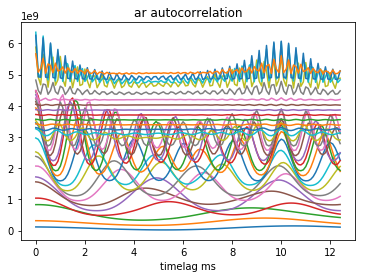

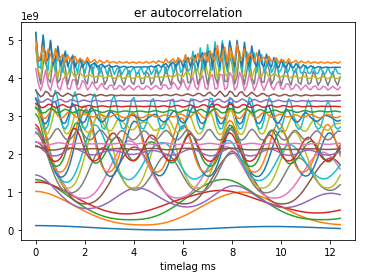

In [73]:
def plot_acg(acg,name):
    x = [0.1*i for i in range(125)]
    ymax = np.max(np.array(acg))
    for i in range(0,64,2):
        y = np.array(acg[i][:])+(i/64)*ymax*2
        plt.plot(x,y)
    plt.xlabel("timelag ms")
    plt.title(name)
    plt.show()
plot_acg(acg_ar,"ar autocorrelation")
plot_acg(acg_er,"er autocorrelation")


The above is simply a plot of autocorrelation without consider the timestep j and only the autocorrelation function of every second channel is shown. This is similar to the correlogram of the paper.

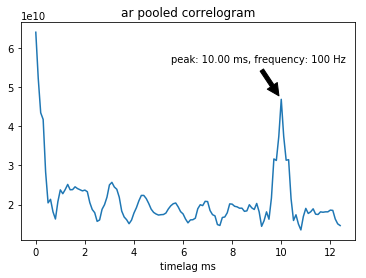

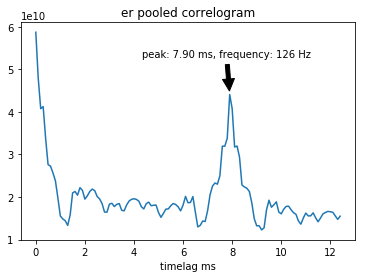

In [79]:
def pooled(acg):
    s = [0 for t in range(max_delay)]
    for c in range(channel):
        for d in range(max_delay):
            s[d] += acg[c][d]
    return s

def plot_pooled(acg,name):
    x = [0.1*i for i in range(125)]
    s = pooled(acg)
    ymax = max(s[10:125])
    xmax = x[s.index(ymax)]
    ax = plt.subplot(111)
    frequency = 1/(float(xmax)/1000)
    plt.annotate('peak: %.2f ms, frequency: %d Hz'%(float(xmax),frequency), xy=(xmax, ymax), xytext=(xmax*0.55, ymax*1.2),
                arrowprops=dict(facecolor='black', shrink=0.1),
                )
    plt.xlabel("timelag ms")
    plt.title(name)
    plt.plot(x,s)
    plt.show()
plot_pooled(acg_ar,"ar pooled correlogram")
plot_pooled(acg_er,"er pooled correlogram")

The peak's time lag correspond to period, from which we calculate the frequency.

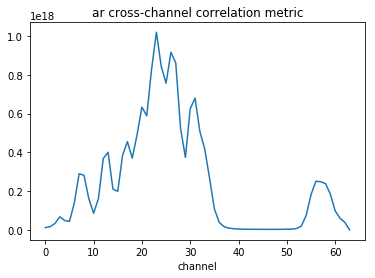

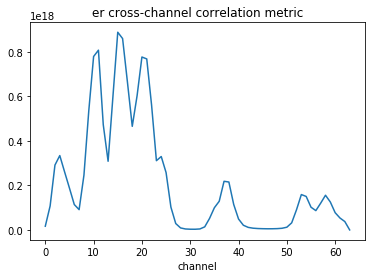

In [63]:
def cross(acg):
    s = [0 for c in range(channel)]
    for c in range(0,channel-1):
        for d in range(max_delay):
            s[c] += acg[c][d]*acg[c+1][d]/max_delay
    return s

def plot_cross(acg,name):
    x = [i for i in range(64)]
    s = cross(acg)
    ax = plt.subplot(111)
    plt.xlabel("channel")
    plt.title(name)
    plt.plot(x,s)
    plt.show()
plot_cross(acg_ar,"ar cross-channel correlation metric")
plot_cross(acg_er,"er cross-channel correlation metric")